# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Would happily fly them agai...
1,"Not Verified | Flew premium, only worth the e..."
2,✅ Trip Verified | First our morning flight wa...
3,✅ Trip Verified | Although it was a bit uncom...
4,✅ Trip Verified | Boarding was decently organ...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df =pd.read_csv("data/BA_reviews.csv")
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Would happily fly them agai...
1,1,"Not Verified | Flew premium, only worth the e..."
2,2,✅ Trip Verified | First our morning flight wa...
3,3,✅ Trip Verified | Although it was a bit uncom...
4,4,✅ Trip Verified | Boarding was decently organ...
...,...,...
995,995,✅ Trip Verified | Check-in at Vienna Airport w...
996,996,✅ Trip Verified | Took a day trip to Vienna wi...
997,997,✅ Trip Verified | Glasgow to Heathrow. BA are...
998,998,✅ Trip Verified | London to Phoenix this week...


In [6]:
df = df.drop(df.columns[0], axis=1)
df['reviews'] = df['reviews'].str.extract(r'\|(.+)', expand=False)
df['reviews'] = df['reviews'].str.replace(r'[^\w\s]+', '')
df

C:\Users\jinty\AppData\Local\Temp/ipykernel_3524/3980450813.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace(r'[^\w\s]+', '')


,reviews
0,Would happily fly them again I had a persona...
1,Flew premium only worth the extra money for ...
2,First our morning flight was cancelled and m...
3,Although it was a bit uncomfortable flight i...
4,Boarding was decently organised The A380 sti...
...,...
995,Checkin at Vienna Airport was painless BA use...
996,Took a day trip to Vienna with British Airway...
997,Glasgow to Heathrow BA are a disgrace it onc...
998,London to Phoenix this week Having a window ...


In [7]:
import nltk
nltk.download('punkt')
df['tokens'] = df['reviews'].apply(nltk.word_tokenize)
df['tokens']
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jinty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviews,tokens
0,Would happily fly them again I had a persona...,"[Would, happily, fly, them, again, I, had, a, ..."
1,Flew premium only worth the extra money for ...,"[Flew, premium, only, worth, the, extra, money..."
2,First our morning flight was cancelled and m...,"[First, our, morning, flight, was, cancelled, ..."
3,Although it was a bit uncomfortable flight i...,"[Although, it, was, a, bit, uncomfortable, fli..."
4,Boarding was decently organised The A380 sti...,"[Boarding, was, decently, organised, The, A380..."
...,...,...
995,Checkin at Vienna Airport was painless BA use...,"[Checkin, at, Vienna, Airport, was, painless, ..."
996,Took a day trip to Vienna with British Airway...,"[Took, a, day, trip, to, Vienna, with, British..."
997,Glasgow to Heathrow BA are a disgrace it onc...,"[Glasgow, to, Heathrow, BA, are, a, disgrace, ..."
998,London to Phoenix this week Having a window ...,"[London, to, Phoenix, this, week, Having, a, w..."


In [8]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def analyze_sentiment(tokens):
    text = ' '.join(tokens)
    scores = analyzer.polarity_scores(text)
    return scores['compound']
df['sentiment_score'] = df['tokens'].apply(analyze_sentiment)
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jinty\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,tokens,sentiment_score
0,Would happily fly them again I had a persona...,"[Would, happily, fly, them, again, I, had, a, ...",0.9455
1,Flew premium only worth the extra money for ...,"[Flew, premium, only, worth, the, extra, money...",0.4985
2,First our morning flight was cancelled and m...,"[First, our, morning, flight, was, cancelled, ...",-0.7960
3,Although it was a bit uncomfortable flight i...,"[Although, it, was, a, bit, uncomfortable, fli...",0.6597
4,Boarding was decently organised The A380 sti...,"[Boarding, was, decently, organised, The, A380...",0.7104
...,...,...,...
995,Checkin at Vienna Airport was painless BA use...,"[Checkin, at, Vienna, Airport, was, painless, ...",0.9621
996,Took a day trip to Vienna with British Airway...,"[Took, a, day, trip, to, Vienna, with, British...",-0.6975
997,Glasgow to Heathrow BA are a disgrace it onc...,"[Glasgow, to, Heathrow, BA, are, a, disgrace, ...",-0.9599
998,London to Phoenix this week Having a window ...,"[London, to, Phoenix, this, week, Having, a, w...",0.9094


In [9]:
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)
df

,reviews,tokens,sentiment_score,sentiment
0,Would happily fly them again I had a persona...,"[Would, happily, fly, them, again, I, had, a, ...",0.9455,positive
1,Flew premium only worth the extra money for ...,"[Flew, premium, only, worth, the, extra, money...",0.4985,positive
2,First our morning flight was cancelled and m...,"[First, our, morning, flight, was, cancelled, ...",-0.7960,negative
3,Although it was a bit uncomfortable flight i...,"[Although, it, was, a, bit, uncomfortable, fli...",0.6597,positive
4,Boarding was decently organised The A380 sti...,"[Boarding, was, decently, organised, The, A380...",0.7104,positive
...,...,...,...,...
995,Checkin at Vienna Airport was painless BA use...,"[Checkin, at, Vienna, Airport, was, painless, ...",0.9621,positive
996,Took a day trip to Vienna with British Airway...,"[Took, a, day, trip, to, Vienna, with, British...",-0.6975,negative
997,Glasgow to Heathrow BA are a disgrace it onc...,"[Glasgow, to, Heathrow, BA, are, a, disgrace, ...",-0.9599,negative
998,London to Phoenix this week Having a window ...,"[London, to, Phoenix, this, week, Having, a, w...",0.9094,positive


In [10]:
classified = df['sentiment'].value_counts()
classified

positive    522
negative    451
neutral      27
Name: sentiment, dtype: int64

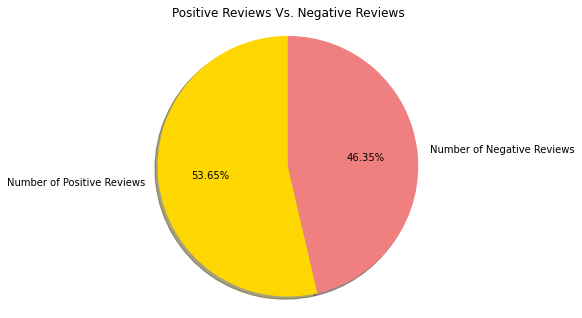

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = [classified['positive'], classified['negative']]

ax.pie(values, 
       labels = ['Number of Positive Reviews', 'Number of Negative Reviews'],
       colors=['gold', 'lightcoral'],
       shadow=True,
       startangle=90, 
       autopct='%1.2f%%')
ax.axis('equal')
plt.title('Positive Reviews Vs. Negative Reviews');

In [12]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()
def lemmatized_tokens(list):
    output = []
    for word in list:
        output.append(lemmatizer.lemmatize(word))
    return output
        


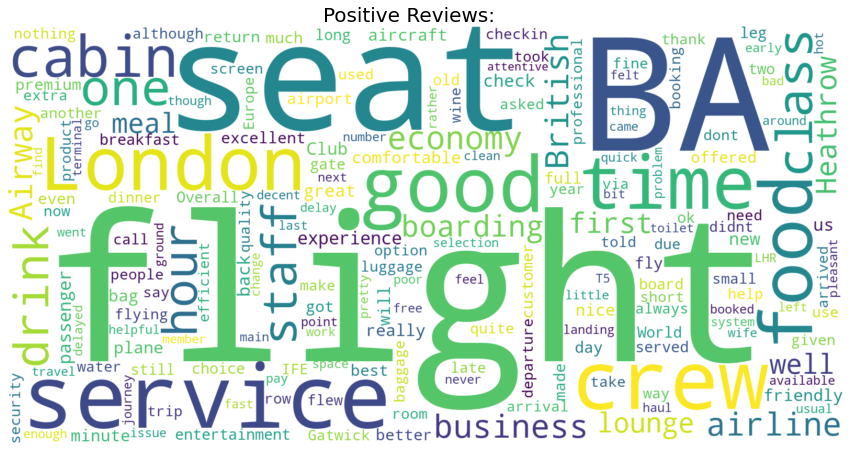

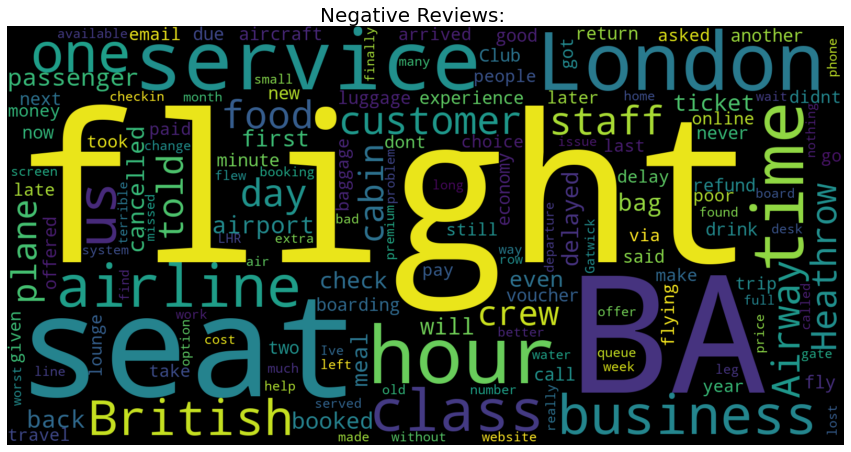

In [22]:
from wordcloud import WordCloud
def wordcloud(review_df, review_colname, color, title):
    '''    
    INPUTS:
        reivew_df - dataframe, positive or negative reviews
        review_colname - column name, positive or negative review
        color - background color of worldcloud
        title - title of the wordcloud
    OUTPUT:
    Wordcloud visuazliation
    '''  
    target_df = review_df.loc[df['sentiment'] == review_colname]
    text = target_df['reviews'].tolist()
    #print(text)
    text_str = ' '.join(lemmatized_tokens(text)) #call function "lemmatized_tokens"
    #print(text_str)
    wordcloud = WordCloud(collocations = False,
                          background_color = color,
                          width=1600, 
                          height=800, 
                          margin=2,
                          min_font_size=20).generate(text_str)

    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figtext(.5,.8,title,fontsize = 20, ha='center')
    plt.show()     
    
# Wordcoulds for Positive Reviews
wordcloud(df,'positive', 'white','Positive Reviews: ')

# # WordCoulds for Negative Reviews
wordcloud(df,'negative', 'black', 'Negative Reviews:')